In [1]:
from ultralytics import YOLO
import torch

model = YOLO("deco-yolo8n.yaml").cuda()
# model = YOLO("yolo11n.yaml").cuda()
# input = torch.ones(16, 640, 640, 3).cuda()
model

/home/dblab/anaconda3/envs/test/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AssertionError: 

In [2]:
from ultralytics import YOLO
import torch

model = YOLO("dyolo10n.yaml").cuda()
# input = torch.ones(16, 640, 640, 3).cuda()
model

/home/dblab/anaconda3/envs/dcnv4/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


128


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [51]:
from torch.utils.benchmark import Timer

timer = Timer(
    stmt = 'output = layer(data)',
    setup='data = input',
    globals={'input': input, 'layer': linear}
)
print(timer.blocked_autorange(min_run_time=1))

output = layer(data)
setup: data = input
  Median: 811.17 us
  IQR:    7.21 us (809.07 to 816.28)
  13 measurements, 100 runs per measurement, 1 thread


model params mAP time pre inf post FPS
yolov8 3,151,904 0.374 0.8518 0.0668 0.5054 0.2796 1173.98
yolov10 2,762,608 0.385 0.7283 0.0674 0.6296 0.0313 1373.10
yolov11 2,616,248 0.395 0.8970 0.0693 0.5641 0.2637 1114.83

g = max(4, c//16), max(4, c//16)
dyolov8 2,820,784 0.382 0.8511 0.0663 0.5163 0.2686 1174.98
dyolov10 2,864,928 0.390 0.7662 0.0658 0.6657 0.0347 1305.14
dyolov11 2,681,720 0.388 0.9412 0.0681 0.6090 0.2640 1062.52

g = 1, max(4, c//16)
dyolov8 2,935,472 0.384 0.8468 0.0665 0.5162 0.2642 1180.95
dyolov10 2,979,616 0.394 0.7638 0.0661 0.6642 0.0334 1309.30
dyolov11 2,730,872 0.390 0.9441 0.0675 0.6127 0.2639 1059.24

g = 1, max(8, c//16), 8,10은 4와 동일
dyolov8 2,935,472 0.386 0.8532 0.0658 0.5196 0.2678 1172.04
dyolov10 2,979,616 0.393 0.7582 0.0660 0.6589 0.0333 1318.95
dyolov11 2,784,536 0.391 0.9308 0.0671 0.6030 0.2607 1074.30

g = 1, c2//16
cba(c2)
ccba
ccbac

In [10]:
1. dcnv8 block별 map 확인
2. yolo8,10,11 val 하여 time, map확인
3. 2번 결과대로 그래프 뽑고 논문 수정하기
4. code 정리하고 github readme 작성하기

0.943

In [22]:
import os, csv

class Model():
    def __init__(self, name):
        self.data = dict()
        self.model = None
        self.name = name
        self.csv = f'runs2/detect/{name}/results.csv'
        self.weight = f'runs2/detect/{name}/weights/best.pt'
        self.read_csv()
    
    def read_csv(self):
        assert os.path.exists(self.csv)
        with open(self.csv, 'r', encoding='utf-8') as csv_file:
            reader = csv.reader(csv_file)
            keys = []
            for i, row in enumerate(reader):
                if not i:
                    for key in row:
                        key_ = key.strip()
                        self.data[key_] = []
                        keys.append(key_)
                else:
                    for value, key in zip(row, keys):
                        self.data[key].append(float(value))


In [50]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def graph1(data, loc='upper left', xlabel='', ylabel='', ylim=[]):
    np.random.seed(23)

    for x, y, label, shape in zip(data['x'], data['y'], data['label'], data['shape']):
        plt.plot(x, y, shape, label=label)

    if data['label']:
        plt.legend(loc=loc, ncols=2)

    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    if ylim: plt.ylim(ylim)

    plt.show()
        

def graph2(data, loc='upper left', width=0.6):
    np.random.seed(23)

    x = np.arange(len(data['y1'][0]))

    width = width/len(data['y1'])
    m = 0
    fig, ax = plt.subplots(layout='constrained')
    for y, label in zip(data['y1'], data['label']):
        offset = width * m
        sticks = ax.bar(x + offset, y, width, label=label)
        ax.bar_label(sticks, padding=2)
        m += 1

    ax.set_xticks(x + width/2*(len(data['y1'])-1), data['xtick'])
    ax.set_ylabel('mAP')
    ax.legend(loc=loc, ncols=4)

    ax.set_ylim([34, 45])

    ax2 = ax.twinx()
    width = width/len(data['y2'])
    m = 0
    for y, s in zip(data['y2'], data['shape']):
        offset = width * m
        points = ax2.plot(x + offset, y, s)
        for xx, yy in zip(x+offset, y):
            ax2.text(xx-0.08, yy+0.03, f'{yy:0.2f}')
        m += 2
    ax2.set_ylabel('post-process + inference + post-process time\n(ms)')
    ax2.set_ylim([-0.5,1.3])
    
    plt.show()
    

In [61]:
def parse1(models):
    plot_data = {'x':[], 'y':[], 'label':[], 'shape':[]}
    
    for model_key, model_value in models.items():
        for model_name, model in model_value.items():
            plot_data['x'] += [model.data['epoch']]
            plot_data['y'] += [np.array(model.data['metrics/mAP50-95(B)'])] if model_key == 'DeCo' else \
                                [np.array(model.data['metrics/mAP50-95(B)'])-0.05]
            plot_data['label'] += [model.name]
            plot_data['shape'] += ['-'] if model_key == 'DeCo' else ['--']
    return plot_data

def parse2(models):
    data = {'x':[], 'y':[], 'label':[], 'shape':[]}
    for model_key, model_value in models.items():
        for model_name, model in model_value.items():
            data['x'] += [model.data['time']]
            data['y'] += [max(model.data['metrics/mAP50-95(B)'])]
            data['label'] += [model.name]
            data['shape'] += ['v'] if model_key == 'DeCo' else ['o']

    return data
    
def parse3(models):
    bar_data = {'y1':[], 'y2':[], 'y3':[], 'xtick':[], 'label':[], 'shape':[]}
    data_shape = [len(models.keys()), len(list(models.values())[0])]

    for model_key, model_value in models.items():
        bar_data['y1'] += [[]]
        bar_data['y2'] += [[]]
        bar_data['y3'] += [[]]
        for (model_name, model) in model_value.items():
            map = float(f"{model.data['mAP']*100:.2f}")
            bar_data['y1'][-1] += [map]
            bar_data['y2'][-1] += [model.data['time']]
            bar_data['y3'][-1] += [model.data['param']]
            bar_data['xtick'] += [model.name] if model_key != 'DeCo' else []
        bar_data['label'] += [model_key]
        bar_data['shape'] += ['o'] if model_key != 'DeCo' else ['v']

    bar_data['y1'] = np.array(bar_data['y1']).reshape(data_shape)
    bar_data['y2'] = np.array(bar_data['y2']).reshape(data_shape)
    bar_data['y3'] = np.array(bar_data['y3']).reshape(data_shape)
    return bar_data

def ratio_bar(data):
    print(f"mAP: {data['y1'][1] - data['y1'][0]}, {(data['y1'][1] - data['y1'][0])/data['y1'][0]*100}%")
    print(f"time: {data['y2'][1] - data['y2'][0]}, {(data['y2'][1] - data['y2'][0])/data['y2'][0]*100}%")
    print(f"param: {data['y3'][1] - data['y3'][0]}, {(data['y3'][1] - data['y3'][0])/data['y2'][0]*100}%")


In [78]:
def get_models():
    models = dict()
    models_ = {'YOLO':['YOLO8n', 'YOLO10n', 'YOLO11n'], 
               'DeCo':['DeCo-YOLO8n', 'DeCo-YOLO10n', 'DeCo-YOLO11n']}
    for model_key, model_value in models_.items():
        model_dict = {}
        for model in model_value:
            model_dict[model] = Model(model)
        models[model_key] = model_dict

    models['YOLO']['YOLO8n'].data['param'] = 3.15
    models['YOLO']['YOLO8n'].data['time'] = 0.8518
    models['YOLO']['YOLO8n'].data['mAP'] = 0.374
    models['YOLO']['YOLO10n'].data['param'] = 2.76
    models['YOLO']['YOLO10n'].data['time'] = 0.7283
    models['YOLO']['YOLO10n'].data['mAP'] = 0.385
    models['YOLO']['YOLO11n'].data['param'] = 2.62
    models['YOLO']['YOLO11n'].data['time'] = 0.8970
    models['YOLO']['YOLO11n'].data['mAP'] = 0.395

    models['DeCo']['DeCo-YOLO8n'].data['param'] = 2.94
    models['DeCo']['DeCo-YOLO8n'].data['time'] = 0.8532
    models['DeCo']['DeCo-YOLO8n'].data['mAP'] = 0.386
    models['DeCo']['DeCo-YOLO10n'].data['param'] = 2.98
    models['DeCo']['DeCo-YOLO10n'].data['time'] = 0.7638
    models['DeCo']['DeCo-YOLO10n'].data['mAP'] = 0.394
    models['DeCo']['DeCo-YOLO11n'].data['param'] = 2.78
    models['DeCo']['DeCo-YOLO11n'].data['time'] = 0.9308
    models['DeCo']['DeCo-YOLO11n'].data['mAP'] = 0.391
    
    return models

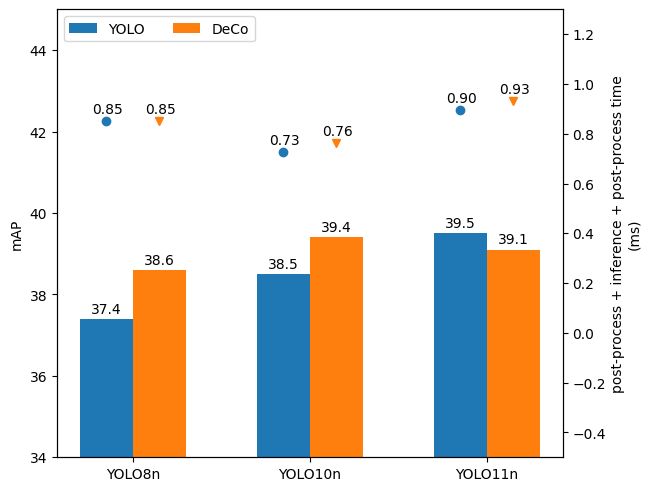

mAP: [ 1.2  0.9 -0.4], [ 3.20855615  2.33766234 -1.01265823]%
time: [0.0014 0.0355 0.0338], [0.16435783 4.87436496 3.76811594]%
param: [-0.21  0.22  0.16], [-24.65367457  30.20733214  17.83723523]%


In [79]:
models = get_models()
bar_data = parse3(models)
graph2(bar_data)
ratio_bar(bar_data)

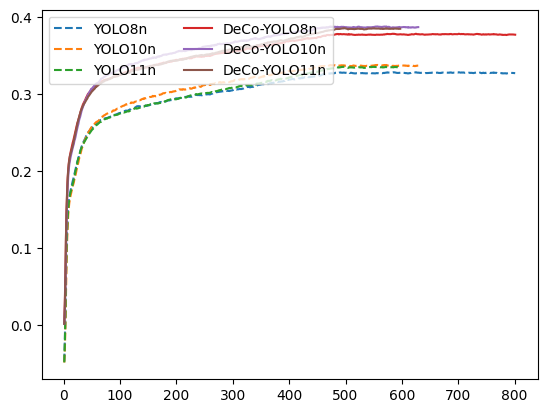

In [9]:
graph1(parse1(models))

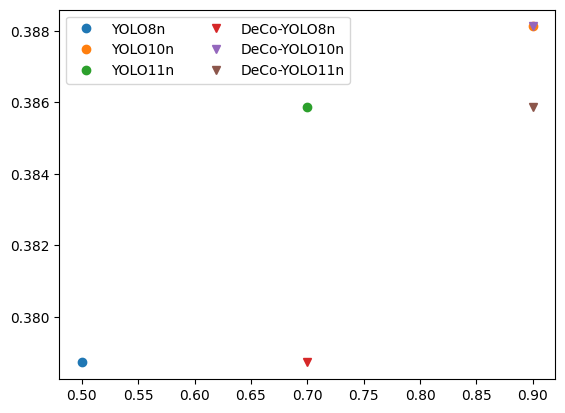

In [10]:
graph1(parse2(models))

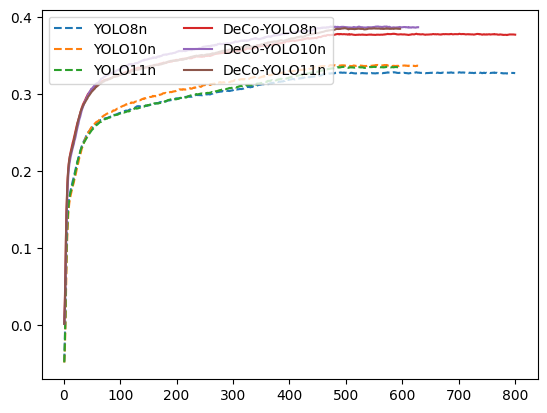

In [73]:
models = get_models()
plot(parse_plot1(models))